# Loan Approval Prediction Project

This project aims to predict whether a loan application will be **Approved** or **Rejected** based on applicant demographics, financial details, credit score, and assets.  

By exploring the dataset, preprocess it, train machine learning models, and evaluate their performance.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report , precision_score,f1_score,confusion_matrix 

In [3]:
LoanData = pd.read_csv("loan_approval_dataset.csv")

In [4]:
LoanData.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
LoanData.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
LoanData.duplicated().sum()

0

#### To remove whitespaces from column name

In [8]:
LoanData = LoanData.rename(columns=lambda x: x.strip())

In [9]:
LoanData.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


#### Visualization

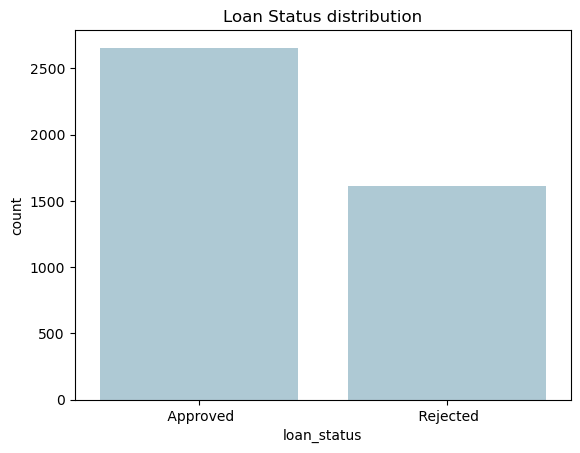

In [18]:
sns.countplot(x = "loan_status" , data = LoanData , color= "#A7CCDB")
plt.title("Loan Status distribution")
plt.show()

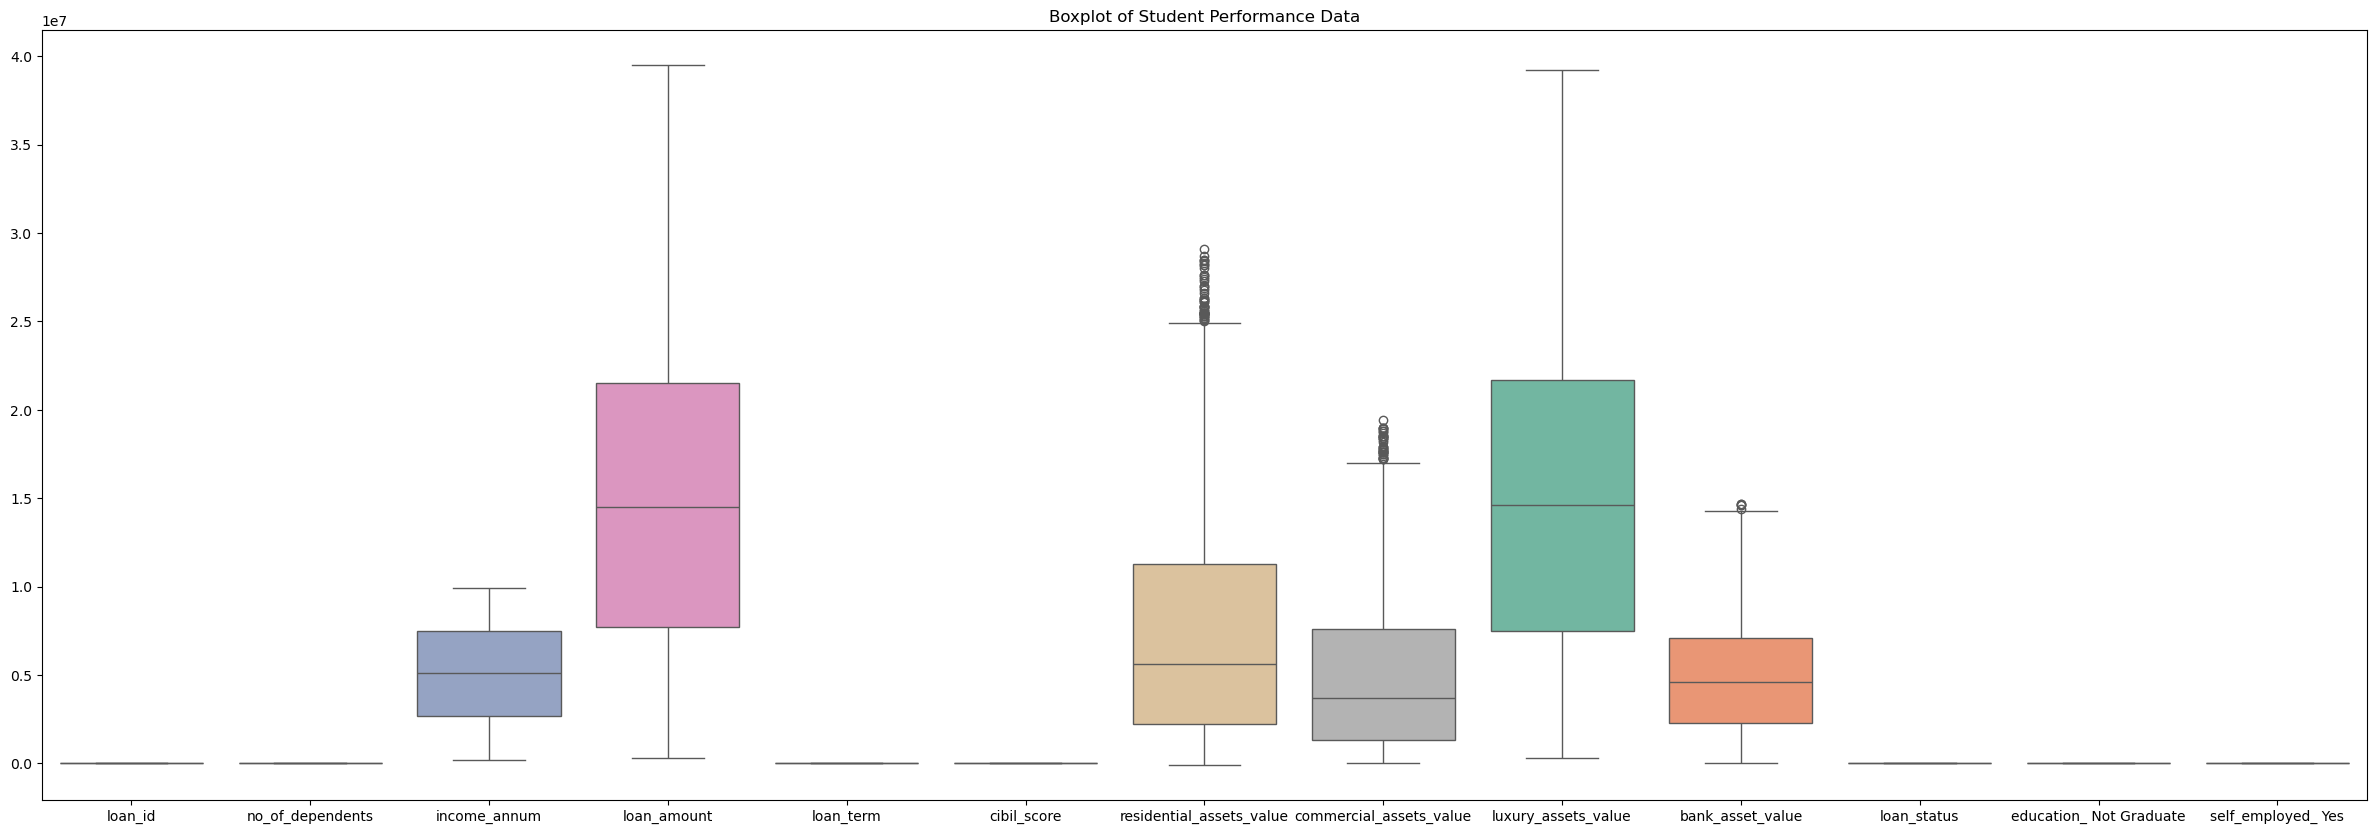

In [46]:
plt.figure(figsize=(30, 10))
plt.title('Boxplot of Student Performance Data')
sns.boxplot(data = LoanData ,palette = "Set2")  
plt.show()

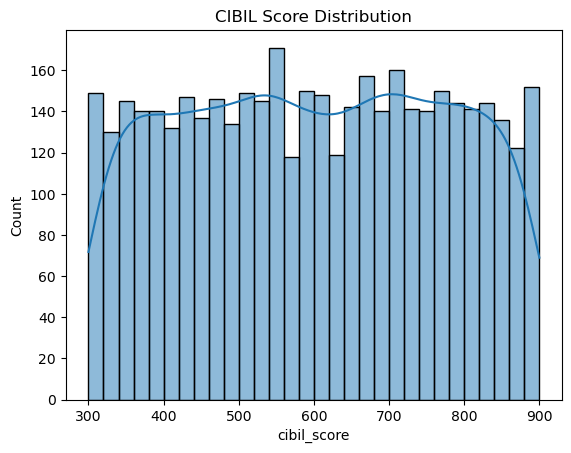

In [22]:
sns.histplot(LoanData["cibil_score"], bins=30, kde=True)
plt.title("CIBIL Score Distribution")
plt.show()

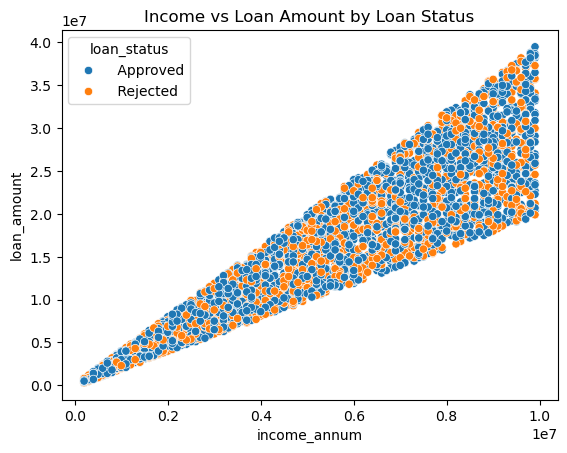

In [24]:
sns.scatterplot(x="income_annum", y="loan_amount", hue="loan_status", data=LoanData)
plt.title("Income vs Loan Amount by Loan Status")
plt.show()

In [25]:
numerical_columns = LoanData.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = LoanData.select_dtypes(include=['object', 'category']).columns.tolist()

In [26]:
print(categorical_columns)

['education', 'self_employed', 'loan_status']


### Encoding Categorical Variables

- **Label Encoding**  
  - Applied to the target variable `loan_status` (Approved/Rejected).  
  - Converts the labels into `0` and `1`.  

- **One-Hot Encoding**  
  - Applied to `education` (Graduate / Not Graduate) and `self_employed` (Yes / No).  
  - Creates binary columns for each category, while using `drop='first'` to avoid the dummy variable trap.  


In [27]:
le = LabelEncoder()
LoanData['loan_status'] = le.fit_transform(LoanData['loan_status'])

In [28]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(LoanData[['education','self_employed']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['education','self_employed']))

LoanData = pd.concat([LoanData.drop(columns=['education','self_employed']).reset_index(drop=True),
                      encoded_df.reset_index(drop=True)], axis=1)

In [29]:
LoanData.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Not Graduate,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0.0,0.0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1.0,1.0
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0.0,0.0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0.0,0.0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1.0,1.0


## Model Training

We experiment with different models:
- Logistic Regression  
- Random Forest    

We use `train_test_split` (70/30) and evaluate models on the test set.

## Model Evaluation

Metrics used:
- Accuracy  
- Precision   
- F1-score  
- Confusion Matrix
- Classification report


In [30]:
scalar= StandardScaler()
X = LoanData.drop("loan_status",axis = 1)
X[numerical_columns] = scalar.fit_transform(X[numerical_columns])
y = LoanData['loan_status']

In [31]:
X_train ,X_test , y_train , y_test = train_test_split(X ,y, test_size= 0.3 , random_state= 42, stratify=y)

#### A) Logistic Regression

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)

In [34]:
print("LogisticRegression Accuracy:", accuracy_lr)

LogisticRegression Accuracy: 0.9258391881342701


In [35]:
print("\nClassification Report (LogisticRegression):\n", classification_report(y_test, y_pred))


Classification Report (LogisticRegression):
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       797
           1       0.91      0.89      0.90       484

    accuracy                           0.93      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.93      0.93      0.93      1281



#### B) Random Forest

In [36]:
rf_model = RandomForestClassifier(
    n_estimators=200,   
    random_state=42,
    max_depth=None,   
    class_weight="balanced" 
)

In [37]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [38]:
y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1_score =f1_score(y_test,y_pred_rf)

In [39]:
print("Random Forest Accuracy:", accuracy)
print("Random Forest Precision:",precision)
print("Random Forest f1-score:",f1_score)

Random Forest Accuracy: 0.9797033567525371
Random Forest Precision: 0.9810924369747899
Random Forest f1-score: 0.9729166666666667


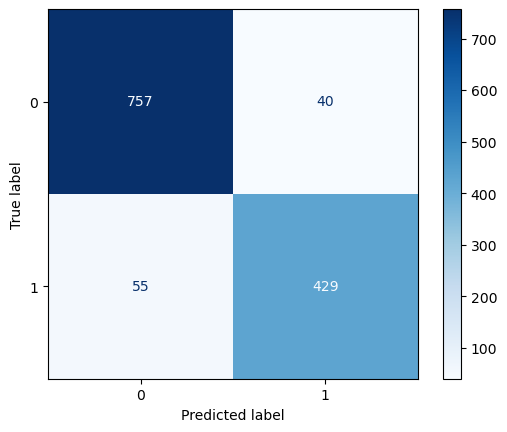

In [40]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [48]:
print("\nClassification Report(RandomForest):\n", classification_report(y_test, y_pred_rf))


Classification Report(RandomForest):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       797
           1       0.98      0.96      0.97       484

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



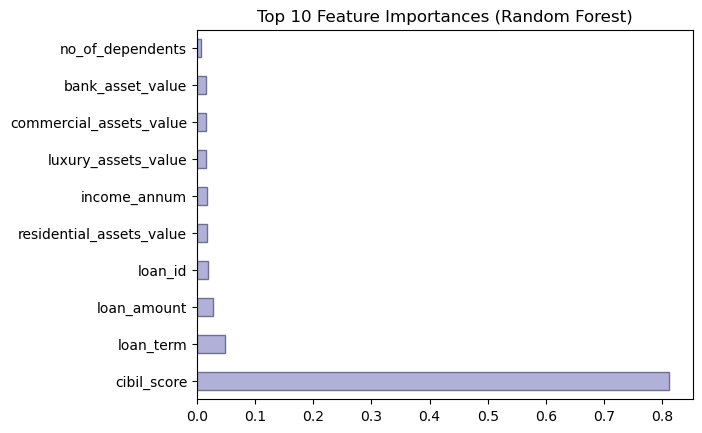

In [53]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh',color='#B1B0D9' , edgecolor = "#71708A")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

### Feature Importance Analysis

From the Random Forest feature importance plot, we observe that **cibil_score is the most important feature** in predicting loan approval decisions.  
This aligns with real-world expectations, since banks and financial institutions rely heavily on credit scores when evaluating applicants.

### **Conclusion:**  
Random Forest significantly outperforms Logistic Regression in this dataset, making it the preferred model for predicting loan approvals.  
However, Logistic Regression is still useful for interpretability and understanding the linear relationships between features and outcomes.